In [1]:
import sys
sys.path.insert(1, '../pro/src') # make sure to use the code in this repo


import lofarSun
from lofarSun import lofarData
import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
# try to use the precise epoch
mpl.rcParams['date.epoch']='1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

%load_ext autoreload
%autoreload 2

In [2]:
dataset=lofarData.LofarDataBF()
dataset.load_fits('../../L698487.cube.fits')


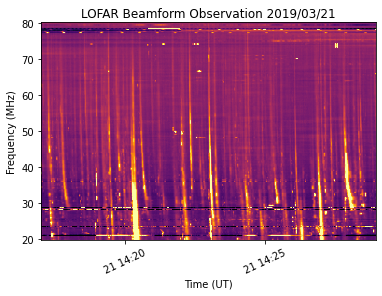

In [3]:
dataset.plot_bf_dyspec()

In [4]:
freq=30
dtime = datetime.datetime(2019, 3, 21, 14, 20, 20, 486000, tzinfo=datetime.timezone.utc)
time=mdates.date2num(dtime)
X,Y,data_bf,x,y,Ibeam=dataset.bf_image_by_freq_time(freq,time,asecpix=20,extrap=True,interpm='cubic')

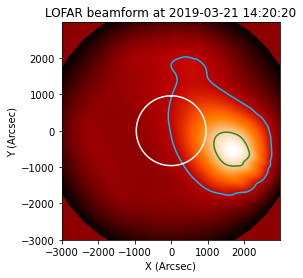

In [5]:
plt.imshow(data_bf)
ax = plt.gca()
im = ax.imshow((data_bf), cmap='gist_heat',
  origin='lower',extent=[np.min(X),np.max(X),np.min(Y),np.max(Y)])
ax.set_xlabel('X (Arcsec)')
ax.set_ylabel('Y (Arcsec)')
ax.set_aspect('equal', 'box')
ax.contour(X,Y,data_bf/np.max(data_bf),levels=[0.5,0.9],colors=['deepskyblue','forestgreen'])
ax.set_title('LOFAR beamform at '+str(dtime)[0:19])
ax.plot(960*np.sin(np.arange(0,2*np.pi,0.001)),
                        960*np.cos(np.arange(0,2*np.pi,0.001)),'w')

ax.get_images()[1].set_clim([0,np.max(data_bf)])

In [4]:
dataset.data_cube.shape
#(freq time beam)

(480, 350, 127)